# HA5

In [1]:
# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
%matplotlib inline

In [53]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('diamonds_500.csv')

In [4]:
data.head()

,carat,cut,depth,price,x,y,z
0,1.00,Very Good,63.5,3858,6.37,6.32,4.03
1,1.02,Very Good,61.6,4291,6.46,6.47,3.98
2,1.25,Premium,62.0,8099,6.88,6.84,4.25
3,0.80,Very Good,61.9,3737,5.93,5.96,3.69
4,0.91,Good,59.9,4309,6.18,6.24,3.72


# Selecting subset features

In [5]:
data.corr()

,carat,depth,price,x,y,z
carat,1.000000,0.000490,0.913612,0.978323,0.978141,0.975653
depth,0.000490,1.000000,-0.019945,-0.034895,-0.036634,0.082426
price,0.913612,-0.019945,1.000000,0.877762,0.880222,0.874172
x,0.978323,-0.034895,0.877762,1.000000,0.999005,0.992642
y,0.978141,-0.036634,0.880222,0.999005,1.000000,0.992485
z,0.975653,0.082426,0.874172,0.992642,0.992485,1.000000


select 'carat', 'x', 'y', 'z' features, becouse this features has high corellations with each other.

In [18]:
selected_features = data[['carat', 'x', 'y', 'z']]

In [19]:
selected_features

,carat,x,y,z
0,1.00,6.37,6.32,4.03
1,1.02,6.46,6.47,3.98
2,1.25,6.88,6.84,4.25
3,0.80,5.93,5.96,3.69
4,0.91,6.18,6.24,3.72
...,...,...,...,...
495,0.41,4.69,4.72,2.94
496,0.90,6.22,6.27,3.77
497,0.30,4.30,4.25,2.70
498,0.51,5.16,5.13,3.16


# Data standartization

In [20]:
def standardizer(data):
    mean = data.mean(axis = 0)
    std = data.std(axis = 0)
    
    minimum = data.min(axis = 0)
    maximum = data.max(axis = 0)
    
    zscore = (data - mean)/std
    rng = (data - mean)/(maximum - minimum)
    rank = (data - minimum)/(maximum - minimum)
    return zscore, rng, rank

In [21]:
zscore, rng, rank = standardizer(selected_features)

In [22]:
rng

,carat,x,y,z
0,0.072108,0.115161,0.106754,0.149294
1,0.079302,0.131797,0.134897,0.133669
2,0.162036,0.209431,0.204315,0.218044
3,0.000165,0.033830,0.039212,0.043044
4,0.039734,0.080041,0.091745,0.052419
...,...,...,...,...
495,-0.140122,-0.195375,-0.193433,-0.191331
496,0.036137,0.087434,0.097373,0.068044
497,-0.179691,-0.267464,-0.281614,-0.266331
498,-0.104151,-0.108499,-0.116510,-0.122581


In [23]:
rank

,carat,x,y,z
0,0.276978,0.447320,0.439024,0.503125
1,0.284173,0.463956,0.467167,0.487500
2,0.366906,0.541590,0.536585,0.571875
3,0.205036,0.365989,0.371482,0.396875
4,0.244604,0.412200,0.424015,0.406250
...,...,...,...,...
495,0.064748,0.136784,0.138837,0.162500
496,0.241007,0.419593,0.429644,0.421875
497,0.025180,0.064695,0.050657,0.087500
498,0.100719,0.223660,0.215760,0.231250


# singular decomposition

In [24]:
def singular_decomposition(x):
    # Compute singular triplets
    z, mu, c = np.linalg.svd(x, full_matrices=True)  
    z = -z
    c = -c 
    mu_arg_max = np.argmax(mu)
    
    n_contributions = np.power(mu, 2)
    ds = np.sum(np.power(x, 2))  # Data Scatter
    p_contributions = np.divide(n_contributions, ds)

    return z, mu, c, n_contributions, p_contributions, mu_arg_max

In [31]:
def print_summory(x):
    z, mu, c, n_contributions, p_contributions, mu_arg_max = singular_decomposition(x)
    print('Natural contributions :', *n_contributions.round(4))
    print('Percent contributions :', *(100*np.array(p_contributions)).round(4))
    print('loadings of 1st component :', *c[mu_arg_max, :].round(4))

In [32]:
for d in [('original data', selected_features), 
          ('Z-Scored standardized data', zscore), 
          ('Ranked standardized data', rank),
          ('Ranged standardized data', rng)]:
    print(d[0])
    print_summory(np.array(d[1]))
    print('*'*100)

original data
Natural contributions : 41113.6678 47.5922 2.6679 0.5758
Percent contributions : 99.8765 0.1156 0.0065 0.0014
loadings of 1st component : 0.0959 0.6448 0.6452 0.3985
****************************************************************************************************
Z-Scored standardized data
Natural contributions : 1975.1343 15.5909 4.7787 0.4961
Percent contributions : 98.9546 0.7811 0.2394 0.0249
loadings of 1st component : 0.4967 0.5015 0.5015 0.5003
****************************************************************************************************
Ranked standardized data
Natural contributions : 268.1312 1.0109 0.2032 0.0203
Percent contributions : 99.5417 0.3753 0.0755 0.0075
loadings of 1st component : 0.3549 0.5287 0.5303 0.5596
****************************************************************************************************
Ranged standardized data
Natural contributions : 74.7274 0.466 0.2015 0.02
Percent contributions : 99.0884 0.6179 0.2672 0.0265
loadings 

In [38]:
from sklearn.decomposition import PCA

In [58]:
z_comp = pca.fit_transform(zscore)
orig_comp = pca.fit_transform(selected_features)
rank_comp = pca.fit_transform(rank)
range_comp = pca.fit_transform(rng)

names = ['Z-normalization', 'Original data', 'Rank-normalization', 'Range-normalization']
tasks = [z_comp, orig_comp, rank_comp, range_comp]

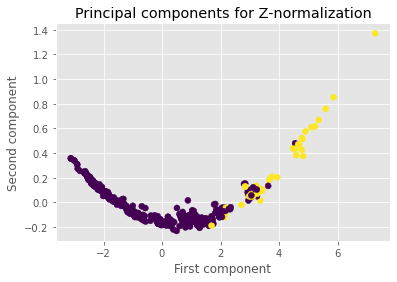

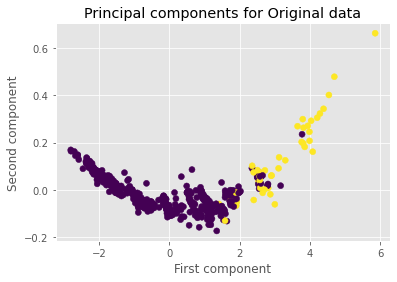

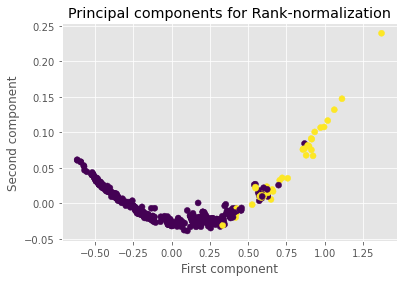

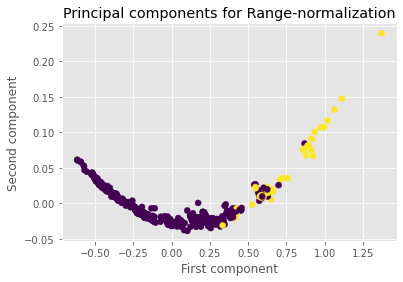

In [67]:
for task, name in zip(tasks, names):
    plt.title(f"Principal components for {name}")
    plt.scatter(task[:,0], task[:,1], c=data['price'] > 10000);
    plt.xlabel("First component")
    plt.ylabel("Second component")
    plt.savefig(f"{name}.png")
    plt.show();

Considering z_score standardized data : <p>
* First component contribution is equal to 98.95 % 
* Second component contribution is equal to 0.78 % 
* Third component contribution is equal to 0.23 % 
* Fourth component contribution is equal to 0.02 %
<p> The first component has the biggest contribution (98.95 %), other components have less than 1% contribution.
<p> Meaning the factor expresses the quality of diamond.

To scale to 0-100, one needs to find $\alpha$ using the following Eqn. <p>
$ z_{1} = \alpha \times( 100 \times c_{1,1} + ... + 100 \times c_{1,v}) $ <p>
$ z_1 = 100 $ <p>
$ \alpha = 1/(c_{1,1} + ... + c_{1,v}) $
    

In [15]:
def ranking_factor(x, n):
    # apply svd we used
    _, _, c, _, _,arg_max_mu = singular_decomposition(x)
    c_max_comp = c[arg_max_mu, :]
    alpha = 1/np.sum(c_max_comp)
    # get loadings
    loading = c_max_comp*alpha 
    # to recieve ranking factors
    ranking_factors = 100*x@(loading)
    # To get top 5
    arg_top_n = np.argsort(ranking_factors)[::-1][:5]
    top_n = ranking_factors[arg_top_n]
    return c_max_comp, loading, arg_top_n, top_n

In [16]:
c_max_comp, loading, arg_top_n, top_n = ranking_factor(np.array(rank), 5)

In [17]:
print('c : ', *c_max_comp.round(4))
print('loading : ', *loading.round(4))
print('top_5 : ', *top_n.round(4))
print('arg_top_5 : ', * arg_top_n.round(4))

c :  0.3549 0.5287 0.5303 0.5596
loading :  0.1798 0.2679 0.2687 0.2835
top_5 :  100.0 87.2928 84.8058 82.678 81.5255
arg_top_5 :  127 326 453 156 246


* there is the perfect diamond (value of ranking factor is 100). It is 127 diamond. This diamond is the best.